In [41]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels

In [44]:
np.shape(X)

(178, 13)

In [45]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels

# Create a DataFrame for X with feature names
X_df = pd.DataFrame(X, columns=wine.feature_names)

# Create a DataFrame for y with a column name
y_df = pd.DataFrame(y, columns=["target"])

# Combine X and y into a single DataFrame
wine_df = pd.concat([X_df, y_df], axis=1)

# Save the DataFrame as a CSV file
wine_df.to_csv("wine_dataset.csv", index=False)


In [46]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [47]:
# 2. Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [49]:
# 3. Apply PCA to reduce the dimensionality
pca = PCA(n_components=5)  # Reduce to 50 components
X_pca = pca.fit_transform(X_scaled)

In [50]:
X_pca

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01,  6.93042841e-01],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01, -2.57654635e-01],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01,
         7.24902309e-01, -2.51033118e-01],
       [ 3.75706561e+00,  2.75637191e+00, -1.76191842e-01,
         5.67983308e-01, -3.11841591e-01],
       [ 1.00890849e+00,  8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01,  2.98457503e-01],
       [ 3.05025392e+00,  2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01, -6.32018734e-01],
       [ 2.44908967e+00,  1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02, -1.02776191e+00],
       [ 2.05943687e+00,  1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00,  7.69034938e-02],
       [ 2.51087430e+00,  9.18070957e-01, -1.77096903e+00,
         5.62703612e-02, -8.92256977e-01],
       [ 2.75362819e+00,  7.89437674e-01, -9.84247490e-01,
         3.49381568e-01

In [51]:
np.shape(X_pca)

(178, 5)

In [52]:
# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [53]:
# 5. Train a Logistic Regression classifier on the reduced data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [54]:
# 6. Make predictions on the test set
y_pred = clf.predict(X_test)

In [55]:
# 7. Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression classifier on PCA-reduced data: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression classifier on PCA-reduced data: 96.30%


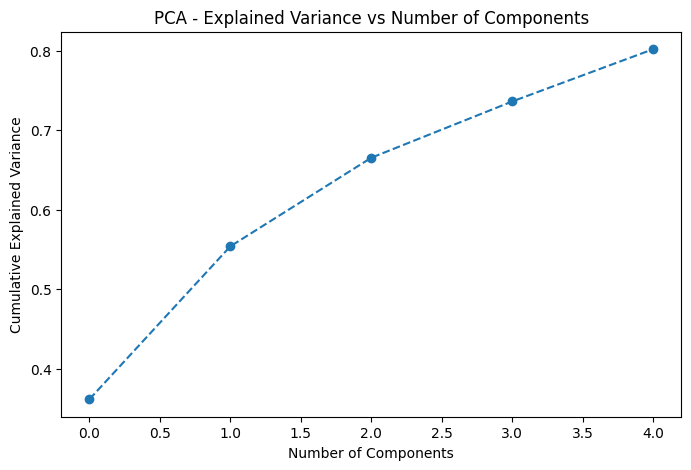

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.show()

## Without PCA

In [57]:
# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Train a Logistic Regression classifier on the reduced data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [58]:
# 6. Make predictions on the test set
y_pred = clf.predict(X_test)

# 7. Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression classifier on PCA-reduced data: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression classifier on PCA-reduced data: 98.15%
